# Creating an OLS function in Python

## Linear Algebra in _numpy_

We reviewed chapter 7 to understand how to generate an inverse matrix.

To transform matrix $X$ into $X^{-1}$. To do so, we must transform $[XI]$ into $[IX^{-1}]$. This is accomplished in chapter 7 of the text book. We are going to check the result using _numpy_.

In [1]:
#invertMatrix.py
import numpy as np
# create array to be transformed into vectors
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print("Array 1:", x1, sep="\n")
print("Array 2:", x2, sep="\n")
print("Array 3:", x3, sep="\n")

Array 1:
[1 2 1]
Array 2:
[4 1 5]
Array 3:
[6 8 6]


In [2]:
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print("Vector 1", x1, sep = "\n")
print("Vector 2", x2, sep = "\n")
print("Vector 3", x3, sep = "\n")

Vector 1
[[1 2 1]]
Vector 2
[[4 1 5]]
Vector 3
[[6 8 6]]


Join x1, x2, and x3 using _np.concatenate()_. We define _axis = 0_ so that the rows are stacked vertically, not  horizontally.

In [3]:
X = np.concatenate((x1, x2, x3), axis = 0)
print("X:", X, sep = "\n")

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]


Now that we have defined our $X$ matrix, we can generate $X^{-1}$ by using _X.getI()_

In [4]:
X_inverse = X.getI()
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5000000e+00 -1.0000000e+00  2.2500000e+00]
 [ 1.5000000e+00 -7.6861594e-17 -2.5000000e-01]
 [ 6.5000000e+00  1.0000000e+00 -1.7500000e+00]]


Next, use _np.round()_ to clearly present variables that include digits to the nth place (17).

In [5]:
X_inverse = np.round(X.getI(), 2)
print("X Inverse:", X_inverse, sep = "\n")

X Inverse:
[[-8.5  -1.    2.25]
 [ 1.5  -0.   -0.25]
 [ 6.5   1.   -1.75]]


Finally, we should also see how to generate the transpose of a matrix. The transpose switches the index values $i$ and $j$. In otherwords, switch the row indexes with the column indexes.

In [6]:
print("X:", X, sep = "\n")
X_transpose = X.getT()
print("X Transpose:", X_transpose, sep = "\n")

X:
[[1 2 1]
 [4 1 5]
 [6 8 6]]
X Transpose:
[[1 4 6]
 [2 1 8]
 [1 5 6]]


## Diversion on Classes in Python

Create a sample class that contains math functions.

In [7]:
class Arithmetic:
    def __init__(self, val):
        self.name = "arithmetic"
        self.val = val
    def add(self, *args):
        total = 0
        try:
            for arg in args:
                total += arg
                
            return total
        except:
            ("pass list or tuple of ints or floats to add()")

    def multiply(self, *args):
        product = 1
        try:
            for arg in args: 
                product *= arg
            return product
        except:
            print("pass only int or float to multiply")
        

In [8]:
arithmetic = Arithmetic(3)
print(arithmetic)
print(arithmetic.add(1,2,3,4))
print(arithmetic.multiply(1,2,3,4))
print(arithmetic.name)
print(arithmetic.val)
print(arithmetic.__dict__)

10
24
arithmetic
3
{'name': 'arithmetic', 'val': 3}


## Building an OLS Regression Function

$\beta = (X'X)^{-1}X'Y$

An OLS regression posits a relationship between a dependent variable, $Y$, and independent variables - each $x_i$ - contained in $X$.

In [9]:
#econFreedomRegression.py
import pandas as pd

data = pd.read_csv("cleanedEconFreedomData.csv", 
    index_col = "Country Name")
data

,World Rank,Region Rank,2017 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,163.0,40.0,48.885716,12.600000,28.400000,27.500000,91.577500,79.877254,97.338404,54.2,...,27.106,32.0,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8
Albania,65.0,30.0,64.353003,54.013250,28.473312,39.707367,86.890400,72.499704,51.540942,79.3,...,30.038,2.8,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9
Algeria,172.0,14.0,46.528581,38.200000,29.631083,31.700000,81.091100,50.955175,19.847749,62.1,...,44.444,39.5,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7
Angola,165.0,41.0,48.515521,36.400000,19.800000,12.800000,87.687500,58.649804,70.743538,58.5,...,28.926,25.1,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3
Argentina,156.0,26.0,50.409088,32.449712,39.580063,38.193866,62.611900,54.638703,56.411450,57.3,...,43.947,42.4,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,179.0,32.0,26.961476,6.762875,10.256410,11.590788,72.511900,51.537290,15.241804,39.7,...,41.032,30.9,515.7,-5.7,0.3,16672.7,8.0,121.7,1591.0,48.8
Vietnam,147.0,35.0,52.437551,49.711775,32.025118,24.648981,79.597600,74.647472,21.108705,61.2,...,28.665,91.6,552.3,6.7,5.9,6024.4,2.1,0.6,11800.0,59.3
Zambia,122.0,23.0,55.799426,49.618581,39.841706,35.001645,73.105211,81.607282,21.571985,66.6,...,25.570,15.5,62.7,3.6,5.4,3868.1,10.7,10.1,1653.0,52.9


In [10]:
from regression import Regression
reg = Regression()
print(reg)
reg.stats.mean([1,2,3,4,5,6])

You created an instance of stats()


3.5

Our _regression.py_ file so far:

In [11]:
class Regression:
    def __init__(self):
        self.stats = stats()
    
    # if constant is True, add a column of ones to 
    # estimate a constant
    def OLS(self, reg_name, data, y_name, beta_names,
            min_val = 0, max_val = None,
            constant = True):
    
        self.min_val = min_val
        if max_val != None:
            self.max_val = max_val
        else:
            self.max_val = len(data)
        self.reg_name = reg_name
        self.y_name = y_name
        
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()
        if constant:
            self.add_constant()

                    
    def add_constant(self):
        self.data["Constant"] = 1
        self.beta_names.append("Constant")

Next, let's call the regression and view the data that now has a column of ones.

In [12]:
#econFreedomRegression.py
# . . .
# dependent variable -- determined by x_vars
y_var = ["GDP per Capita (PPP)"]
# independent variables
x_vars = ["Trade Freedom", "Property Rights", 
          "Inflation (%)",
          "Public Debt (% of GDP)"]

reg.OLS(reg_name = "GDP per Capita", data = data, 
        y_name = y_var, beta_names = x_vars)
reg.data

,World Rank,Region Rank,2017 Score,Property Rights,Judicial Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,...,"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Constant,GDP per Capita (PPP) estimator
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,163.0,40.0,48.885716,12.600000,28.400000,27.500000,91.577500,79.877254,97.338404,54.2,...,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8,1,-10820.028616
Albania,65.0,30.0,64.353003,54.013250,28.473312,39.707367,86.890400,72.499704,51.540942,79.3,...,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9,1,18758.008463
Algeria,172.0,14.0,46.528581,38.200000,29.631083,31.700000,81.091100,50.955175,19.847749,62.1,...,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7,1,10830.335535
Angola,165.0,41.0,48.515521,36.400000,19.800000,12.800000,87.687500,58.649804,70.743538,58.5,...,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3,1,5359.858538
Argentina,156.0,26.0,50.409088,32.449712,39.580063,38.193866,62.611900,54.638703,56.411450,57.3,...,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5,1,6796.620044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,179.0,32.0,26.961476,6.762875,10.256410,11.590788,72.511900,51.537290,15.241804,39.7,...,515.7,-5.7,0.3,16672.7,8.0,121.7,1591.0,48.8,1,6933.433816
Vietnam,147.0,35.0,52.437551,49.711775,32.025118,24.648981,79.597600,74.647472,21.108705,61.2,...,552.3,6.7,5.9,6024.4,2.1,0.6,11800.0,59.3,1,15864.789668
Zambia,122.0,23.0,55.799426,49.618581,39.841706,35.001645,73.105211,81.607282,21.571985,66.6,...,62.7,3.6,5.4,3868.1,10.7,10.1,1653.0,52.9,1,18117.160670


Next we will estimate the influence of each x variable (exogenous) on the y variable (endogenous):
    
$\beta = (X'X)^{-1}X'Y$

$Y =$ Observations for Endogenous Variable

$X =$ Observations for Exogenous Variables

$X' =$ $X$-transpose

$(X'X)^{-1} =$ Inverse of $X'X$

The _regression.py_ file should include the following:

In [13]:
class Regression:
    def __init__(self):
        self.stats = stats()
    
    # if constant is True, add a column of ones to 
    # estimate a constant
    def OLS(self, reg_name, data, y_name, beta_names,
            min_val = 0, max_val = None,
            constant = True):
    
        self.min_val = min_val
        if max_val != None:
            self.max_val = max_val
        else:
            self.max_val = len(data)
        self.reg_name = reg_name
        self.y_name = y_name
        
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()
        if constant:
            self.add_constant()
        self.build_matrices()
        self.estimate_betas_and_yhat()

    def add_constant(self):
        self.data["Constant"] = 1
        self.beta_names.append("Constant")
        
    def build_matrices(self):
        # Transform dataframes to matrices
        self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])
        # create a k X n nested lest containing vectors from each exog var
        self.X = np.matrix(self.data[self.beta_names])
        self.X_transpose = np.matrix(self.X).getT()
        # (X'X)**-1
        X_transp_X = np.matmul(self.X_transpose, self.X)
        self.X_transp_X_inverse = X_transp_X.getI()
        # X'y
        self.X_transp_y = np.matmul(self.X_transpose, self.y)

    def estimate_betas_and_yhat(self):
        # betas = (X'X)**-1 * X'y
        self.betas = np.matmul(self.X_transp_X_inverse, self.X_transp_y)
        # y-hat = X * betas
        self.y_hat = np.matmul(self.X, self.betas)
        self.data[self.y_name[0] + " estimator"] =\
            [i.item(0) for i in self.y_hat]
        # create a table for the estimates
        self.estimates = pd.DataFrame(self.betas, index = self.beta_names,
                                      columns = ["Coefficient"])
        # identify y vairiable in index
        self.estimates.index.name = "y = " + self.y_name[0]

Save the file and rerun your code so that you can call these statistics.

In [14]:
reg.betas

matrix([[    60.47038974],
        [   805.63685839],
        [   215.42709103],
        [   -89.6204527 ],
        [-24027.12022385]])

Next estimate the beta coefficients that indicate the influence of the x (exogenous) variables on the y (endogenous) variable.

$y ̂ = X\beta$

In [15]:
reg.estimates

,Coefficient,SE,t-stat,p-value,significance
y = GDP per Capita (PPP),,,,,
Trade Freedom,60.470390,157.893803,0.382981,0.70221,
Property Rights,805.636858,87.701595,9.186114,0.00000,***
Inflation (%),215.427091,117.099319,1.839696,0.06757,
Public Debt (% of GDP),-89.620453,36.223432,-2.474102,0.01434,*
Constant,-24027.120224,9960.453748,-2.412252,0.01692,*


Next, we will use the sum squared statistics (ssr, sse, and sst) to calculate different variables that reflect the goodness of fit of the regression and its parts.


We define these values as follows:

$SSR = \sum_{i=0}^{n} (y ̂ _{i} - y ̅ )^2$

$SSE = \sum_{i=0}^{n} (y_{i} - y ̂ _{i})^2$

$SST = \sum_{i=0}^{n} (y_{i} - y ̅ _{i})^2$

It happens that the sum of the squared distances between the estimated values and mean of observed values and the squared distances between the observed and estimated values add up to the sum of the squared distances between the observed values and the mean of observed values. We indicate this as:

$SST = SSR + SSE$

The _regression.py_ should look as follows:

In [16]:
class Regression:
    def __init__(self):
        self.stats = stats()
    

    # if constant is True, add a column of ones to 
    # estimate a constant
    def OLS(self, reg_name, data, y_name, beta_names,
            min_val = 0, max_val = None,
            constant = True):
    
        self.min_val = min_val
        if max_val != None:
            self.max_val = max_val
        else:
            self.max_val = len(data)
        self.reg_name = reg_name
        self.y_name = y_name
        
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()
        if constant:
            self.add_constant()
        self.build_matrices()
        self.estimate_betas_and_yhat()
        self.calculate_regression_stats()
        
    def add_constant(self):
        self.data["Constant"] = 1
        self.beta_names.append("Constant")
        
    def calculate_regression_stats(self):
        self.sum_square_stats()
        
    def build_matrices(self):
        # Transform dataframes to matrices
        self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])
        # create a k X n nested lest containing vectors from each exog var
        self.X = np.matrix(self.data[self.beta_names])
        self.X_transpose = np.matrix(self.X).getT()
        # (X'X)**-1
        X_transp_X = np.matmul(self.X_transpose, self.X)
        self.X_transp_X_inverse = X_transp_X.getI()
        # X'y
        self.X_transp_y = np.matmul(self.X_transpose, self.y)

    def estimate_betas_and_yhat(self):
        # betas = (X'X)**-1 * X'y
        self.betas = np.matmul(self.X_transp_X_inverse, self.X_transp_y)
        # y-hat = X * betas
        self.y_hat = np.matmul(self.X, self.betas)
        self.data[self.y_name[0] + " estimator"] =\
            [i.item(0) for i in self.y_hat]
        # create a table for the estimates
        self.estimates = pd.DataFrame(self.betas, index = self.beta_names,
                                      columns = ["Coefficient"])
        # identify y vairiable in index
        self.estimates.index.name = "y = " + self.y_name[0]

    def sum_square_stats(self):
        ssr_list = []
        sse_list = []
        sst_list = []
        mean_y = self.stats.mean(self.y).item(0)
        for i in range(len(self.y)):
            # ssr is sum of squared distances between the estimates
            # and the avergage of y values
            y_hat_i = self.y_hat[i]
            y_i = self.y[i]
            r = y_hat_i - mean_y
            e = y_i - y_hat_i
            t = y_i - mean_y
            ssr_list.append((r) ** 2)
            sse_list.append((e) ** 2)
            sst_list.append((t) ** 2)
        
        # since the ssr, sse, and sst use values from 
        # matrices, select the value within the resultant
        # matrix using matrix.item(0)
        self.ssr = self.stats.total(ssr_list).item(0)
        self.sse = self.stats.total(sse_list).item(0)
        self.sst = self.stats.total(sst_list).item(0)

Save the file and rerun your code so that you can call these statistics.

In [17]:
reg.ssr, reg.sse, reg.sst

(40627979241.38481, 39504107666.815506, 80132086908.20023)


We estimate the variance of the error term of the estimator for the dependent variable. 

$\sigma^2 = \frac{SSE}{n-k}$

$n = $number of observations

$k = $number of independent variables

An increase in the number of exogenous variables tends ot increase the fit of a model. By dividing the $SSE$ by degrees of freedom, $n-k$ , improvements in fit that result from increases in the number of variables are offset in part by a reduction in degrees of freedom.

We can calculate the covariance matrix:

$\sigma^2 (X'X)^{-1}$


The diagonals of the covariance matrix represent the standard errors squared for each variable. The standard what we will use to calculate t-statistics and p-values. The t-statisitic of a coefficient is found by comparing the size of the estimated coefficient to its standard error:

$tstat_{\beta_i}=\frac{\beta_i}{SE_{\beta_i}}$

The larger the coefficient compared to the error, the more reliable is the statistic, as implied by a large t-stat. We draw the p-value associated with a particular t-stat from a table in light of the degrees of freedom associated with the regression. The p-values provides a rating of the estimate in light of the t-stat together with the number of degrees of freedom.

In [18]:
class Regression:
    def __init__(self):
        self.stats = stats()
    

    # if constant is True, add a column of ones to 
    # estimate a constant
    def OLS(self, reg_name, data, y_name, beta_names,
            min_val = 0, max_val = None,
            constant = True):
    
        self.min_val = min_val
        if max_val != None:
            self.max_val = max_val
        else:
            self.max_val = len(data)
        self.reg_name = reg_name
        self.y_name = y_name
        
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()
        if constant:
            self.add_constant()
        self.build_matrices()
        self.estimate_betas_and_yhat()
        self.calculate_regression_stats()
        
    def add_constant(self):
        self.data["Constant"] = 1
        self.beta_names.append("Constant")
        
    def calculate_regression_stats(self):
        self.sum_square_stats()
        self.calculate_degrees_of_freedom()
        self.calculate_estimator_variance()
        self.calculate_covariance_matrix()
        self.calculate_t_p_error_stats()
        
    def build_matrices(self):
        # Transform dataframes to matrices
        self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])
        # create a k X n nested lest containing vectors from each exog var
        self.X = np.matrix(self.data[self.beta_names])
        self.X_transpose = np.matrix(self.X).getT()
        # (X'X)**-1
        X_transp_X = np.matmul(self.X_transpose, self.X)
        self.X_transp_X_inverse = X_transp_X.getI()
        # X'y
        self.X_transp_y = np.matmul(self.X_transpose, self.y)

    def estimate_betas_and_yhat(self):
        # betas = (X'X)**-1 * X'y
        self.betas = np.matmul(self.X_transp_X_inverse, self.X_transp_y)
        # y-hat = X * betas
        self.y_hat = np.matmul(self.X, self.betas)
        self.data[self.y_name[0] + " estimator"] =\
            [i.item(0) for i in self.y_hat]
        self.data["residual"] = self.data[self.y_name[0]].sub(self.data[self.y_name[0] + " estimator"])
        # create a table for the estimates
        self.estimates = pd.DataFrame(self.betas, index = self.beta_names,
                                      columns = ["Coefficient"])
        # identify y vairiable in index
        self.estimates.index.name = "y = " + self.y_name[0]

    def sum_square_stats(self):
        ssr_list = []
        sse_list = []
        sst_list = []
        mean_y = self.stats.mean(self.y).item(0)
        for i in range(len(self.y)):
            # ssr is sum of squared distances between the estimates
            # and the avergage of y values
            y_hat_i = self.y_hat[i]
            y_i = self.y[i]
            r = y_hat_i - mean_y
            e = y_i - y_hat_i
            t = y_i - mean_y
            ssr_list.append((r) ** 2)
            sse_list.append((e) ** 2)
            sst_list.append((t) ** 2)
        
        # since the ssr, sse, and sst use values from 
        # matrices, select the value within the resultant
        # matrix using matrix.item(0)
        self.ssr = self.stats.total(ssr_list).item(0)
        self.sse = self.stats.total(sse_list).item(0)
        self.sst = self.stats.total(sst_list).item(0)
        
    def calculate_degrees_of_freedom(self):
        # Degrees of freedom compares the number of observations to the number  
        # of exogenous variables used to form the prediction          
        self.lost_degrees_of_freedom = len(self.estimates)
        self.num_obs = self.max_val + 1 - self.min_val
        self.degrees_of_freedom = self.num_obs - self.lost_degrees_of_freedom

    def calculate_estimator_variance(self):
        # estimator variance is the sse normalized by the degrees of freedom  
        # thus, estimator variance increases as the number of exogenous  
        # variables used in estimation increases(i.e., as degrees of freedom   
        # fall) 
        self.estimator_variance = self.sse / self.degrees_of_freedom
    
    def calculate_covariance_matrix(self):
        # Covariance matrix will be used to estimate standard errors for  
        # each coefficient.  
        # estimator variance * (X'X)**-1  
        self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inverse
        self.cov_matrix = pd.DataFrame(self.cov_matrix,
                                  columns = self.beta_names,
                                  index = self.beta_names)
        
    def calculate_t_p_error_stats(self):
        results = self.estimates
        stat_sig_names = ["SE", "t-stat", "p-value"]
        # create space in data frame for SE, t, and p
        for stat_name in stat_sig_names:
            results[stat_name] = np.nan
        # generate statistic for each variable
        for var in self.beta_names:
            # SE ** 2 of coefficient is found in the diagonal of the cov_matrix
            results.loc[var]["SE"] = self.cov_matrix[var][var] ** (1/2)     
            # t-stat = Coef / SE
            results.loc[var]["t-stat"] = \
                results["Coefficient"][var] / results["SE"][var]
            # p-values is estimated using a table that transforms t-stat in   
            # light of degrees of freedom  
            # 2 is for 2 tail...
            # 5 is to round to 5 decimal places
            results.loc[var]["p-value"] = np.round(
                t.sf(np.abs(results.loc[var]["t-stat"]), 
                     self.degrees_of_freedom +1) * 2, 5)
        ratings = [.05, .01, .001]
        significance = ["" for name in self.beta_names]
        for i in range(len(self.beta_names)):
            var_name = self.beta_names[i]
            for rating in ratings:
                if results.loc[var_name]["p-value"] < rating:
                    significance[i] = significance[i] + "*"
        results["significance"] = significance

Save the file and rerun your code so that you can call these statistics.

In [19]:
reg.cov_matrix.to_csv("regCovMatrix.csv")
reg.cov_matrix

,Trade Freedom,Property Rights,Inflation (%),Public Debt (% of GDP),Constant
Trade Freedom,2.493045e+04,-9428.587294,-7.911424,746.819189,-1.441626e+06
Property Rights,-9.428587e+03,7691.569780,2454.380917,-710.288113,3.368646e+05
Inflation (%),-7.911424e+00,2454.380917,13712.250604,-100.255941,-1.836721e+05
Public Debt (% of GDP),7.468192e+02,-710.288113,-100.255941,1312.137019,-8.981082e+04
Constant,-1.441626e+06,336864.584639,-183672.106930,-89810.818777,9.921064e+07


Next, we have included the code for generating standard errors, t-stats, and p-values.

In [20]:
reg.estimates.to_csv("regResults.csv")
reg.estimates

,Coefficient,SE,t-stat,p-value,significance
y = GDP per Capita (PPP),,,,,
Trade Freedom,60.470390,157.893803,0.382981,0.70221,
Property Rights,805.636858,87.701595,9.186114,0.00000,***
Inflation (%),215.427091,117.099319,1.839696,0.06757,
Public Debt (% of GDP),-89.620453,36.223432,-2.474102,0.01434,*
Constant,-24027.120224,9960.453748,-2.412252,0.01692,*


$rootMSE = \sqrt{\sigma^2}$


$R^2 = \frac{SSR}{SST}$


$ F =\frac{\frac{SST - SSE}{K - 1}}{\frac{SSE}{N - K}}$

The F-statistic tests the likelihood of whether or not the values of our estimated parameters are all zero:

$\beta_1 = \beta_2 = . . . = \beta_{n-1} = \beta_n$ 


In [21]:
reg.stats_DF.to_csv("regStatistics.csv")
reg.stats_DF

,Estimation Statistics
r**2,5.070126e-01
f-stat,4.319488e+01
Est Var,2.351435e+08
rootMSE,1.533439e+04
SSE,3.950411e+10
SSR,4.062798e+10
SST,8.013209e+10
Obs.,1.730000e+02
DOF,1.680000e+02


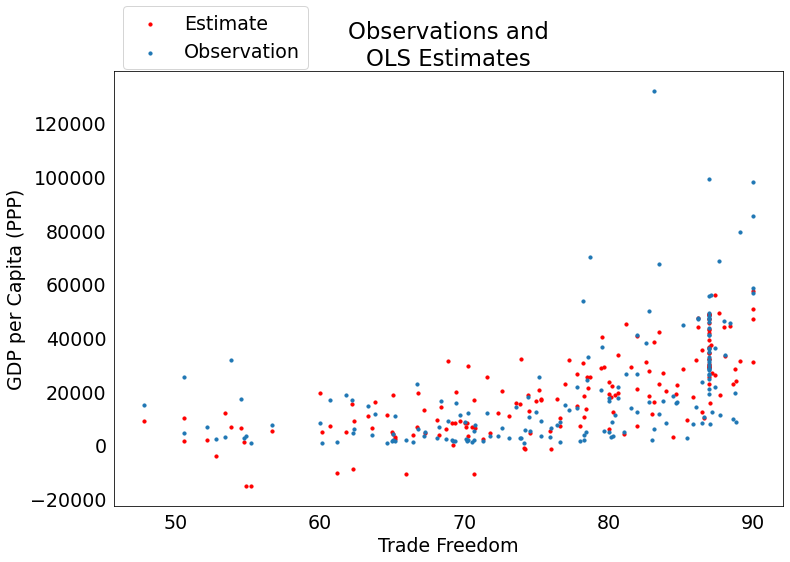

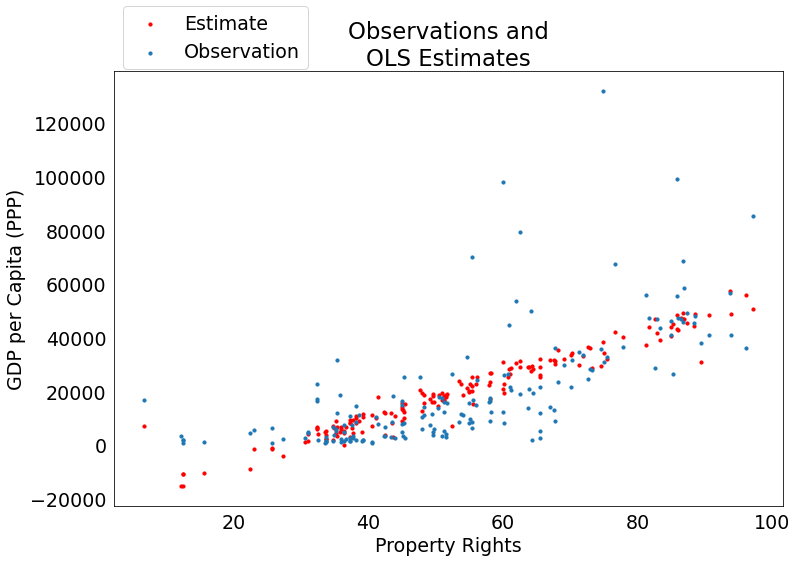

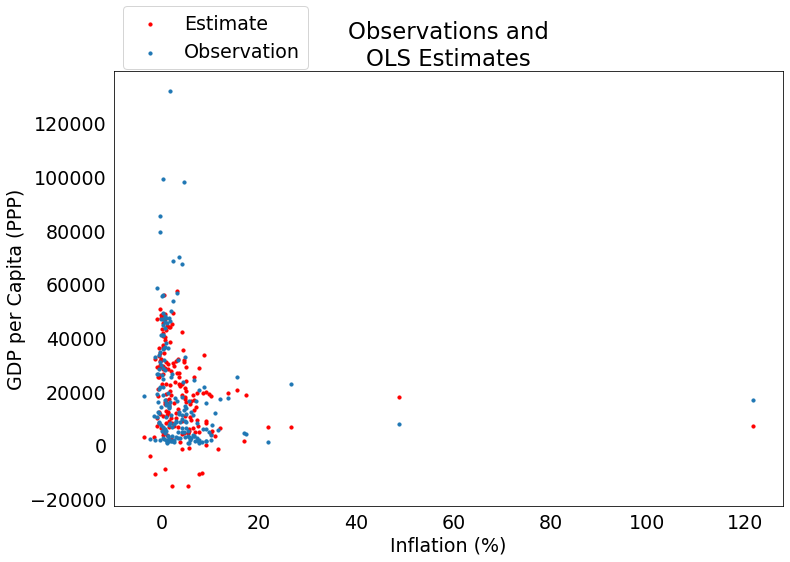

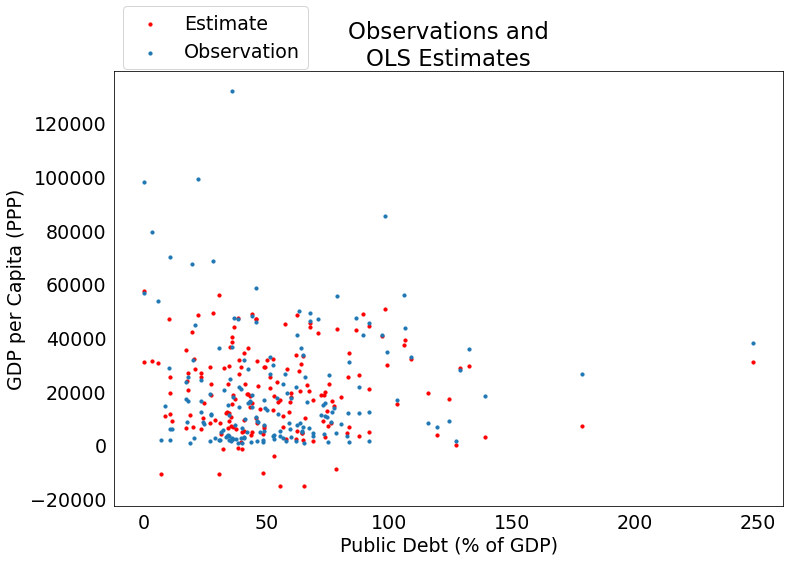

In [22]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_scatter_with_estimator(title, data, x_vars, y_var, pp = None):
    # set default font size
    plt.rcParams.update({"font.size":19})
    # use a loop to call each exogenous
    y = y_var[0]
    for x in x_vars:
        fig, ax = plt.subplots(figsize=(12,8))
        y_label1 = "Estimate"
        y_label2 = "Observation"
        data.plot.scatter(x=x, y=y + " estimator", ax = ax, c = "r",
                         s = 10, label = y_label1, legend = False)
        
        # erase the y_axis label so that "estimator" is not present
        plt.ylabel("")
        data.plot.scatter(x = x, y = y, ax = ax, s = 10, 
                          label = y_label2, legend = False)
        plt.legend(loc="upper left", labels = [y_label1, y_label2],
                  bbox_to_anchor = (0, 1.17))
        
        plt.title("Observations and\nOLS Estimates")
        # remove lines marking unit on the axis
        ax.xaxis.set_ticks_position("none")
        ax.yaxis.set_ticks_position("none")
        if pp != None: pp.savefig(fig, bbox_inches = "tight")
pp = PdfPages("RegressionPlots.pdf")
plot_scatter_with_estimator("Plot", reg.data, x_vars, y_var, pp)

### plot


pp.close()